# 對所有 150 朵 鳶尾 花數據 集 進行分類

In [370]:
from sklearn import datasets
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

### Define tanh && tanh_derivative

In [371]:
def tanh(x):     
    return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))

def tanh_derivative(x):     
    return (1 + tanh(x))*(1 - tanh(x))

### Load iris

In [48]:
iris = datasets.load_iris()
X, y = iris.data[:,(2,3)], iris.target -1

### Standardization

In [372]:
sr = StandardScaler()
X_std = sr.fit_transform(X)

### Define NeuralNetwork

In [373]:
class NeuralNetwork:
    #network consists of a list of integers, indicating 
    #the number of neurons in each layer
    def __init__(self, net_arch): 
        np.random.seed(0)                  
        self.activity = tanh         
        self.activity_derivative = tanh_derivative 
        self.layers = len(net_arch)         
        self.steps_per_epoch = 1000
        self.arch = net_arch        

        self.weights = []         
        #range of weight values (-1,1)         
        for layer in range(len(net_arch) - 1):             
            w = 2*np.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1           
            self.weights.append(w)

    def fit(self, data, labels, learning_rate=0.1, epochs=10):         
        #Add bias units to the input layer         
        ones = np.ones((1, data.shape[0]))        
        Z = np.concatenate((ones.T, data), axis=1)
        training = epochs*self.steps_per_epoch


        for k in range(training):             
            if k % self.steps_per_epoch == 0:                  
                print('epochs: {}'.format(k/self.steps_per_epoch), end=" ")              
                print('Accuracy_score: {:.2f}'.format(self.acc(data, labels)))

            sample = np.random.randint(data.shape[0])            
            y = [Z[sample]]

            for i in range(len(self.weights)-1):                     
                activation = np.dot(y[i], self.weights[i])                         
                activity = self.activity(activation)  
                #add the bias for the next layer                     
                activity = np.concatenate((np.ones(1), np.array(activity)))                      
                y.append(activity)   
             
            #last layer              
            activation = np.dot(y[-1], self.weights[-1])             
            activity = self.activity(activation)             
            y.append(activity)
                    
            #error for the output layer             
            error = labels[sample] - y[-1]
            delta_vec = [error * self.activity_derivative(y[-1])] 

            #we need to begin from the back from the next to last layer
            for i in range(self.layers-2, 0, -1):  
                #delta_vec [1].dot(self.weights[i][1:].T)                
                error = delta_vec[-1].dot(self.weights[i][1:].T) 
                error = error*self.activity_derivative(y[i][1:])               
                delta_vec.append(error)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            delta_vec.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, nn.arch[i]+1) 
 
                delta = delta_vec[i].reshape(1, nn.arch[i+1])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x, acc=False):
        x = np.array(x)
        if x.shape == (2, ):
            val = np.concatenate((np.ones(1), np.array(x)))      
            for i in range(0, len(self.weights)):
                val = self.activity(np.dot(val, self.weights[i]))
                val = np.concatenate((np.ones(1).T, np.array(val)))
            if acc:
                return np.around(val[1])
            return val[1]
        else:
            val = np.concatenate((np.ones(x.shape[0]).reshape(1, x.shape[0]).T, x), axis=1)
            for i in range(0, len(self.weights)):
                val = self.activity(np.dot(val, self.weights[i]))
                val = np.concatenate((np.ones(x.shape[0]).reshape(1, x.shape[0]).T, np.array(val)), axis=1)
            if acc:
                return np.around(val[:, 1])
            return val[:, 1]
    
    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^', 's')
        colors = ('red', 'blue', 'green')
        cmap = ListedColormap(colors)
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        resolution = max(x1_max - x1_min, x2_max - x2_min)/float(points)
        #resolution = 0.01
     
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        input = np.array([xx1.ravel(), xx2.ravel()]).T 
        Z = np.empty(0)
        for i in range(input.shape[0]):
            val = nn.predict(np.array(input[i]), acc=True)
            Z = np.append(Z, val)

        Z = Z.reshape(xx1.shape)
        
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot all samples

        classes = ["-1", "0", "1"]
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1.0, c=cmap(idx), edgecolor="black",marker=markers[idx], s=80, label=classes[idx])
            
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()
    
    def acc(self, x, y):
        return accuracy_score(y , self.predict(x, acc=True))

### Train nn [ 2, 200, 1]

In [374]:
nn = NeuralNetwork([2, 200, 1])
nn.fit(X_std, y)

epochs: 0.0 Accuracy_score: 0.67
epochs: 1.0 Accuracy_score: 0.78
epochs: 2.0 Accuracy_score: 0.80
epochs: 3.0 Accuracy_score: 0.81
epochs: 4.0 Accuracy_score: 0.89
epochs: 5.0 Accuracy_score: 0.71
epochs: 6.0 Accuracy_score: 0.92
epochs: 7.0 Accuracy_score: 0.93
epochs: 8.0 Accuracy_score: 0.86
epochs: 9.0 Accuracy_score: 0.95


Accuracy_score: 0.97


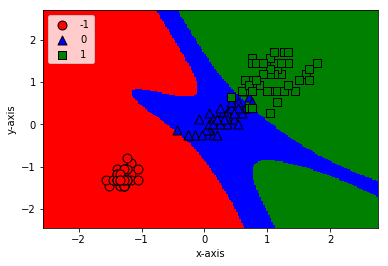

In [375]:
print('Accuracy_score: {:.2f}'.format(nn.acc(X_std, y)))
nn.plot_decision_regions(X_std, y)

### Train nn [2, 200, 1] in training set

In [376]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y,test_size=0.3, random_state=0)
nn = NeuralNetwork([2, 200, 1])
nn.fit(X_train_std, y_train)

epochs: 0.0 Accuracy_score: 0.70
epochs: 1.0 Accuracy_score: 0.84
epochs: 2.0 Accuracy_score: 0.70
epochs: 3.0 Accuracy_score: 0.71
epochs: 4.0 Accuracy_score: 0.93
epochs: 5.0 Accuracy_score: 0.87
epochs: 6.0 Accuracy_score: 0.90
epochs: 7.0 Accuracy_score: 0.95
epochs: 8.0 Accuracy_score: 0.95
epochs: 9.0 Accuracy_score: 0.95


Layers [2, 200, 1]
Accuracy_score for training set: 0.95
Accuracy_score for testing set: 0.96


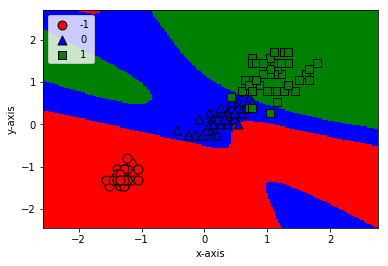

In [377]:
print('Layers [2, 200, 1]')
print('Accuracy_score for training set: {:.2f}'.format(nn.acc(X_train_std, y_train)))
print('Accuracy_score for testing set: {:.2f}'.format(nn.acc(X_test_std, y_test)))
nn.plot_decision_regions(X_std, y)

In [378]:
nn =  NeuralNetwork([2, 100, 100 , 1])
nn.fit(X_train_std, y_train)

epochs: 0.0 Accuracy_score: 0.24
epochs: 1.0 Accuracy_score: 0.66
epochs: 2.0 Accuracy_score: 0.94
epochs: 3.0 Accuracy_score: 0.90
epochs: 4.0 Accuracy_score: 0.92
epochs: 5.0 Accuracy_score: 0.91
epochs: 6.0 Accuracy_score: 0.96
epochs: 7.0 Accuracy_score: 0.98
epochs: 8.0 Accuracy_score: 0.95
epochs: 9.0 Accuracy_score: 0.96


Layers [2, 100, 100 , 1]
Accuracy_score for training set: 0.96
Accuracy_score for testing set: 0.98


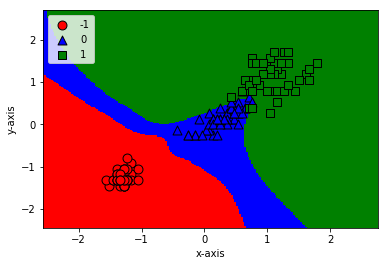

In [380]:
print('Layers [2, 100, 100 , 1]')
print('Accuracy_score for training set: {:.2f}'.format(nn.acc(X_train_std, y_train)))
print('Accuracy_score for testing set: {:.2f}'.format(nn.acc(X_test_std, y_test)))
nn.plot_decision_regions(X_std, y)

**為何Neurol數相同但Depth比較深的神經網路會比較好?**  
就實務上而言flat network選對Activation function與loss function的確能fit很多模型  
但hidden layer只有一層能影響hidden layer的只有input  
如果hidden layer有很多層比如二層好了  
第二層會被第一層的hidden layer與input layer影響  
直觀來說模型會比較契合真正的function  

### 將輸出層的 Activation  Function 改為 Softmax

In [340]:
def softmax(x):
    return np.exp(x)/ np.exp(x).sum()

def softmax_derivative(x):
    jacobaian_m = np.diag(x)
    for i in range(len(jacobaian_m)):
        for j in range(len(jacobaian_m)):
            if i == j:
                jacobaian_m[i][j] = x[i]*(1-x[i])
            else:
                jacobaian_m[i][j] = -x[i]*x[j]
    return np.diag(jacobaian_m)

In [382]:
class SoftmaxNeuralNetwork:
    def __init__(self, net_arch): 
        np.random.seed(0)                  
        self.activity = tanh         
        self.activity_derivative = tanh_derivative 
        self.layers = len(net_arch)         
        self.steps_per_epoch = 1000
        self.arch = net_arch        
        self.softmax = softmax
        self.softmax_derivative = softmax_derivative
        
        self.weights = []         
        #range of weight values (-1,1)         
        for layer in range(len(net_arch) - 1):             
            w = 2*np.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1           
            self.weights.append(w)

    
    def fit(self, data, labels, learning_rate=0.1, epochs=10):         
        #Add bias units to the input layer         
        ones = np.ones((1, data.shape[0]))        
        Z = np.concatenate((ones.T, data), axis=1)
        training = epochs*self.steps_per_epoch
        for k in range(training):             
            if k % self.steps_per_epoch == 0:                  
                print('epochs: {}'.format(k/self.steps_per_epoch), end=" ")
                print('Accuracy_score: {:.2f}'.format(self.acc(data, labels)))

            sample = np.random.randint(data.shape[0])            
            y = [Z[sample]]

            for i in range(len(self.weights)-1):
                activation = np.dot(y[i], self.weights[i])                         
                activity = self.activity(activation)  
                #add the bias for the next layer                     
                activity = np.concatenate((np.ones(1), np.array(activity)))                      
                y.append(activity)   
            
            #last layer              
            activation = np.dot(y[-1], self.weights[-1])             
            activity = self.softmax(activation)
            y.append(activity)
                    
            #error for the output layer             
            error = labels[sample] - y[-1]             
            delta_vec = [error * self.softmax_derivative(y[-1])] 

            #we need to begin from the back from the next to last layer
            for i in range(self.layers-2, 0, -1):  
                #delta_vec [1].dot(self.weights[i][1:].T)                
                error = delta_vec[-1].dot(self.weights[i][1:].T) 
                error = error*self.activity_derivative(y[i][1:])               
                delta_vec.append(error)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            delta_vec.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, nn.arch[i]+1) 
 
                delta = delta_vec[i].reshape(1, nn.arch[i+1])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x, acc = False):
        x = np.array(x)
        if x.shape == (2, ):
            val = np.concatenate((np.ones(1), np.array(x)))      
            for i in range(0, len(self.weights) - 1):
                val = self.activity(np.dot(val, self.weights[i]))
                val = np.concatenate((np.ones(1).T, np.array(val)))
            if acc:
                return np.argmax(self.softmax(np.dot(val, self.weights[-1])))
            return self.softmax(np.dot(val, self.weights[-1]))
        else:
            val = np.concatenate((np.ones(x.shape[0]).reshape(1, x.shape[0]).T, x), axis=1)
            for i in range(0, len(self.weights) - 1):
                val = self.activity(np.dot(val, self.weights[i]))
                val = np.concatenate((np.ones(x.shape[0]).reshape(1, x.shape[0]).T, np.array(val)), axis=1)
            if acc:
                return np.argmax(self.softmax(np.dot(val, self.weights[-1])), axis=1)
            return self.softmax(np.dot(val, self.weights[-1]))
        
    def acc(self, x, y):
        return accuracy_score(np.argmax(y, axis=1) , self.predict(x, acc=True))
    
        
    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^', 's')
        colors = ('red', 'blue', 'green')
        cmap = ListedColormap(colors)
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        resolution = max(x1_max - x1_min, x2_max - x2_min)/float(points)
        #resolution = 0.01
     
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        input = np.array([xx1.ravel(), xx2.ravel()]).T 
        Z = np.empty(0)
        for i in range(input.shape[0]):
            val = nn.predict(np.array(input[i]), acc=True)
            Z = np.append(Z, val)

        Z = Z.reshape(xx1.shape)
        
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot all samples
        y = np.argmax(y, axis=1)
        classes = ["0", "1", "2"]
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1.0, c=cmap(idx), edgecolor="black",marker=markers[idx], s=80, label=classes[idx])
            
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()

In [383]:
oh = OneHotEncoder(sparse=0)
y_oh = oh.fit_transform((y+1).reshape(-1,1))
X_train_std, X_test_std, y_train_oh, y_test_oh = train_test_split(X_std, y_oh,test_size=0.3, random_state=0)

In [396]:
nn = SoftmaxNeuralNetwork([2, 50, 3])
nn.fit(X_train_std, y_train_oh)

epochs: 0.0 Accuracy_score: 0.70
epochs: 1.0 Accuracy_score: 0.93
epochs: 2.0 Accuracy_score: 0.95
epochs: 3.0 Accuracy_score: 0.94
epochs: 4.0 Accuracy_score: 0.95
epochs: 5.0 Accuracy_score: 0.95
epochs: 6.0 Accuracy_score: 0.95
epochs: 7.0 Accuracy_score: 0.95
epochs: 8.0 Accuracy_score: 0.95
epochs: 9.0 Accuracy_score: 0.95


Layers [2, 50, 3]
Accuracy_score for training set: 0.96
Accuracy_score for testing set: 0.98


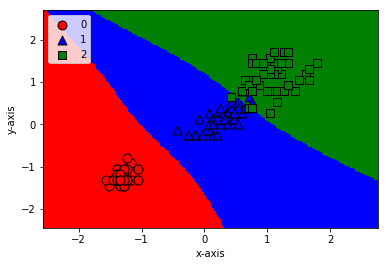

In [397]:
print('Layers [2, 50, 3]')
print('Accuracy_score for training set: {:.2f}'.format(nn.acc(X_train_std, y_train_oh)))
print('Accuracy_score for testing set: {:.2f}'.format(nn.acc(X_test_std, y_test_oh)))
nn.plot_decision_regions(X_std, y_oh)